In [1]:
# Import modules
import datetime

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Import spice and load SPICE kernels
import spiceypy
spiceypy.furnsh("../_spice_kernels/spk/de432s.bsp")
spiceypy.furnsh("../_spice_kernels/lsk/naif0012.tls")

In [2]:
# Settign datetime array with a resolutin of 1 hour
utc_datetime_array = np.arange(datetime.datetime(2022, 1, 1, 0, 0, 0),
                               datetime.datetime(2022, 1, 7, 0, 0, 0),
                               datetime.timedelta(hours=1)).astype(datetime.datetime)

# Convert to Ephemeris Time array
et_array = [spiceypy.utc2et(x.strftime("%Y-%m-%dT%H:%M:%S")) for x in utc_datetime_array]

In [3]:
# List that will contain the distances between Earth and Sun
earth_sun_dist = []

# Iterate over the ET array, compute position Earth - Sun and compute the distance
for et in et_array:
    earth_sun_vec, _ = spiceypy.spkgps(targ=10,
                                       et=et,
                                       ref="ECLIPJ2000",
                                       obs=399)
    earth_sun_dist.append(np.linalg.norm(earth_sun_vec))

# Scale the distance by Millions
earth_sun_dist = np.array(earth_sun_dist)
earth_sun_dist /= 1e6

# Where is the perihelion? Get the timestamp
min_dist_arg = np.argmin(earth_sun_dist)
min_dist_utc = utc_datetime_array[min_dist_arg]

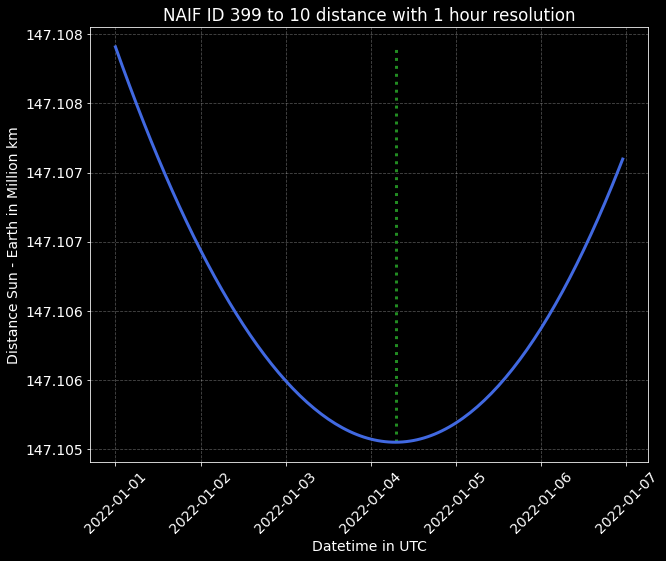

In [4]:
# Set some styling
font = {'size': 14}
matplotlib.rc('font', **font)
plt.style.use("dark_background")

# Create plot
plt.figure(figsize=(10, 8))

# Plot the distance and a vertical line where the perihelion is / was
plt.plot(utc_datetime_array, earth_sun_dist, lw=3, color="royalblue")
plt.vlines(min_dist_utc, ymin=min(earth_sun_dist), ymax=max(earth_sun_dist), linestyle="dotted",
           color="forestgreen", lw=3)

# Title, labelling etc.
plt.title("NAIF ID 399 to 10 distance with 1 hour resolution")
plt.xlabel("Datetime in UTC")
plt.ylabel("Distance Sun - Earth in Million km")

# Some formatting
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.3f}'))
plt.xticks(rotation = 45)
plt.grid(True, alpha=0.3, linestyle="dashed")

# Save the figure
plt.savefig("distance_earth_sun_2022.png", dpi=300)